# Hybrid Images

## TAG-DSP Advanced Lecture #1

In [79]:
# let's import some packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage, fftpack
from numpy import fft

%matplotlib inline

### What's a hybrid image?

Hybrid imaging is a computational photography technique which produces static images with two interpretations. If you look at the image from very close, you see one image, but if you look from far away, then you see another!

Here's an example of a hybrid image:

![Hybrid image by Blade Chapman](imgs/combined.png)
(Photo by Blade Chapman)

### How do they work?

This is actually an application of a superposition of two image filters onto one. The idea is that we can combine a low-pass filtered image with a high-pass filtered image, and exploiting the difference in perception to see the difference when you look at it from a distance versus when you see it up close. The high-pass filtered image can be seen far away, and the low-pass filtered image can be seen up close. Let's see why this happens by actually low-pass filtering the image itself!

### Low-Pass Filtering an Image 

Let's start with one of the original images.

In [40]:
def plot(data, title):
    plot.i += 1
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

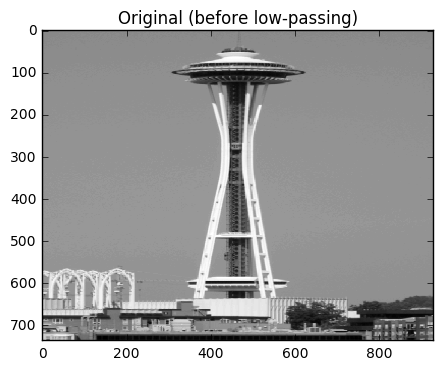

In [71]:
lp_add = cv2.imread('imgs/im1.png', cv2.IMREAD_GRAYSCALE)
plot(lp_add, "Original (before low-passing)")
plot.i += 1

Let's take a look at the 2-dimensional FFT of the image, to visualize the frequencies in the image:

In [84]:
# Let's take a look at the FFT of the signal
def fft2d(image):
    return 20*np.log(np.abs(fft.fftshift(fft.fft2(image))))

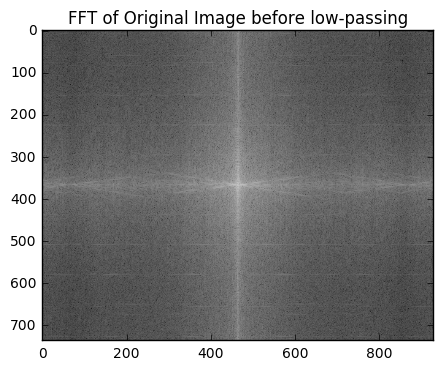

In [85]:
lp_image_fft = fft2d(lp_add)
plot(lp_image_fft, "FFT of Original Image before low-passing")

We can see we have quite a bit of frequencies in the middle, and not a lot near the edges. We also notice that there's a lot of repeating lines vertically, indicating that there's some kind of vertical frequency that's repeating. 

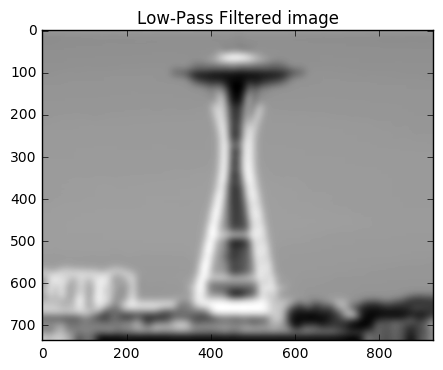

In [115]:
sigma_low_pass = 10

lowpass = ndimage.gaussian_filter(lp_add, sigma_low_pass)
plot(lowpass, 'Low-Pass Filtered image')

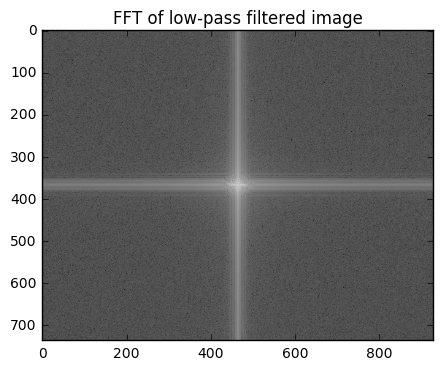

In [87]:
lowpass_fft = fft2d(lowpass)
plot(lowpass_fft, 'FFT of low-pass filtered image')

As we can see, the FFT of the low-passed image looks significantly different than the original, as the center frequencies are the only ones that are repeated. Everything else turns into static.

### High-Pass Filtering an Image

A high-pass filter essentially acts as an opposite to the low-pass filter. It filters out the low frequencies in the image, and keeps the high ones. What this essentially means is that the high-pass filter essentially acts as an edge-detection filter. It preserves edges and throws away everything else.

So, let's load our second image, and high-pass filter it.

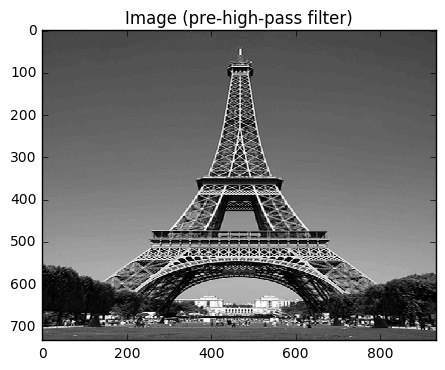

In [89]:
img_hp = cv2.imread("imgs/im2.png", cv2.IMREAD_GRAYSCALE)
plot(img_hp, "Image (pre-high-pass filter)")

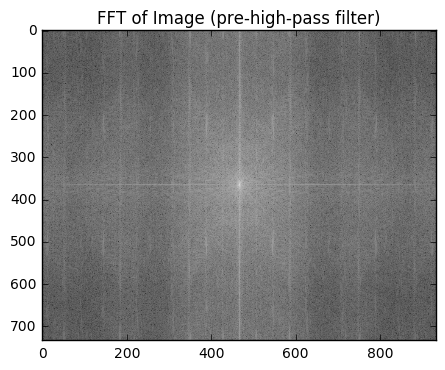

In [90]:
img_hp_fft = fft2d(img_hp)
plot(img_hp_fft, "FFT of Image (pre-high-pass filter)")

Unlike the previous image, here we have a lot of repeating (in the horizontal direction) components. This indicates that there are some patterns along the horizontal direction (in this case, that the Eiffel Tower is symmetric about the y-axis).

To create a high-pass filter, we can simply subtract the low-passed filtered image from the high-pass filtered image. This is equivalent to convolving the original image with the identity matrix minus the low-pass kernel (or, in LaTeX terms:)

$$I_{hp} = I_{orig} - I_{lp} = I_{orig} * (K_{Identity} - K_{lp})$$

Let's see this in Python:

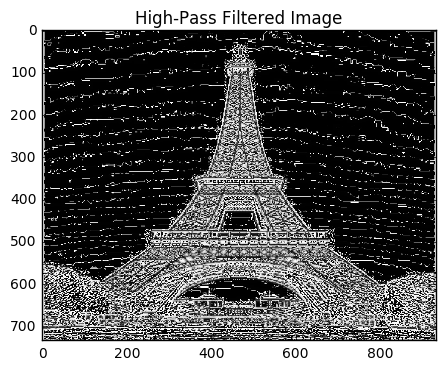

In [112]:
sigma_high_pass = 2

img_lp = ndimage.gaussian_filter(img_hp, sigma_high_pass)
img_hp_filtered = img_hp - img_lp

plot(img_hp_filtered, "High-Pass Filtered Image")

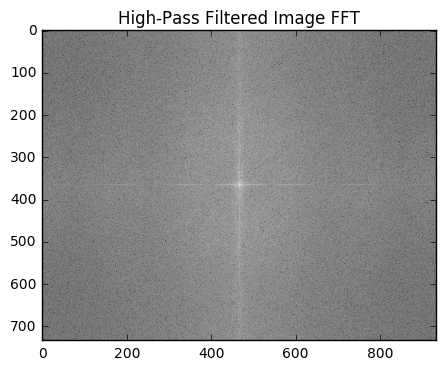

In [116]:
img_hp_fft = fft2d(img_hp_filtered)
plot(img_hp_fft, "High-Pass Filtered Image FFT")

Here, we see that the lower frequencies are much smaller than the original were, and the repeating horizontal frequencies are somewhat preserved.

Now, we can add the two images together to get the final "hybrid image":

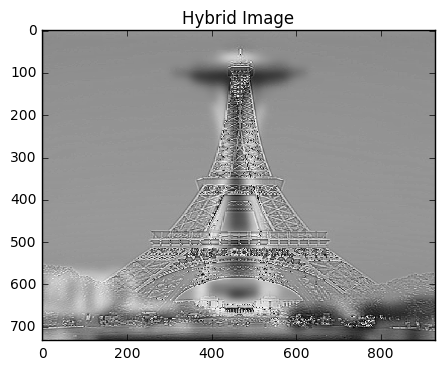

In [114]:
# this is just so the dimensions of the images match up
hybrid_image = img_hp_filtered[0:733,0:928] + lowpass[0:733,0:928]

plot(hybrid_image, "Hybrid Image")

Try it with your own images and see what happens!